Identify complex rotator candidates by finding harmonics in a periodogram.
Run a periodogram
Identify at what period is the strongest signal
Check to see if there are additional peaks (±10%) at harmonics of the main period


In [2]:
!pip install lightkurve
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.signal import find_peaks

from scipy.datasets import electrocardiogram

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 19.5 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=2b4dcf5088dff3cdc933924d6368b2eaae6ab97ad134d6826ecd5039849c7306
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50453 sha256=394054f346a14ff18690030a968964e08f9f7ba551519d12af7401b3891df7a7
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b55

In [3]:

star = 'TIC 118449916'

In [4]:
searchresult = lk.search_lightcurve(star,cadence=120,author="SPOC")
searchresult

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,SPOC,120,118449916,0.0
1,TESS Sector 44,2021,SPOC,120,118449916,0.0
2,TESS Sector 70,2023,SPOC,120,118449916,0.0
3,TESS Sector 71,2023,SPOC,120,118449916,0.0


In [5]:
lc_cycle = searchresult[0:2].download_all()

In [6]:
stitched = lc_cycle.stitch()

<Axes: title={'center': 'TIC 118449916'}, xlabel='Phase', ylabel='Cycle'>

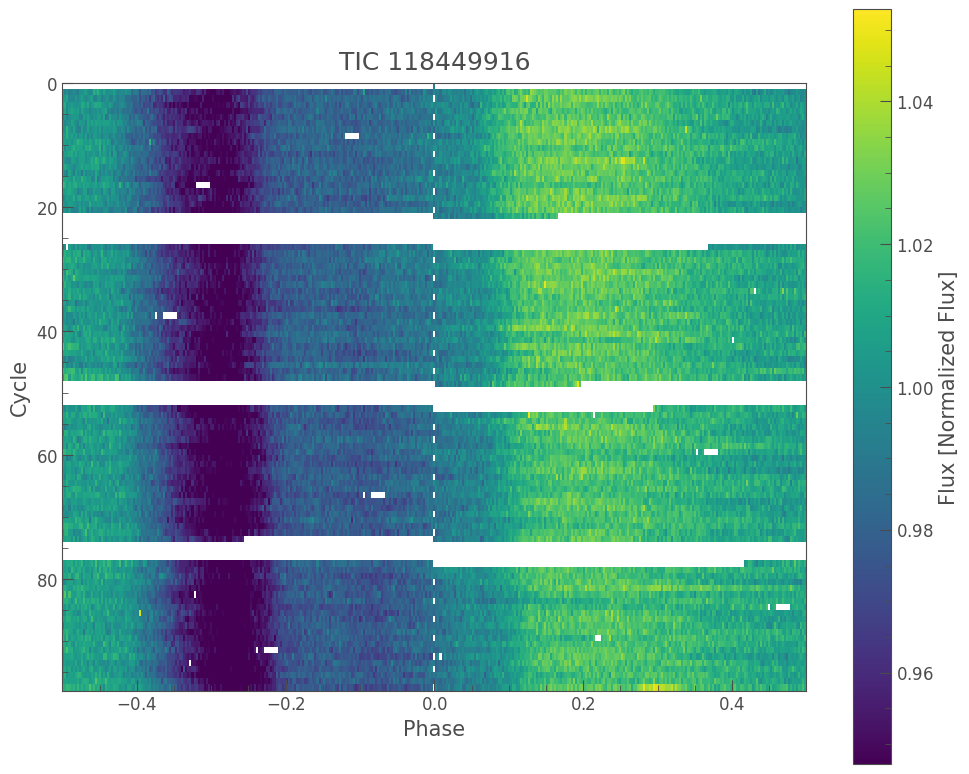

In [7]:
stitched.plot_river(period=stitched.to_periodogram().period_at_max_power)

In [8]:
period = stitched.to_periodogram().period_at_max_power
period

<Quantity 0.51301976 d>

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

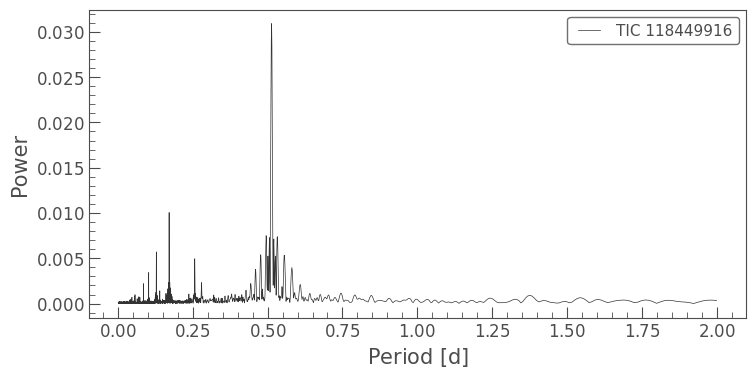

In [9]:
periodo = stitched.to_periodogram(maximum_period=2.0)
periodo.plot(view ='period')

#plt.xlim(0,1)

NameError: name 'x' is not defined

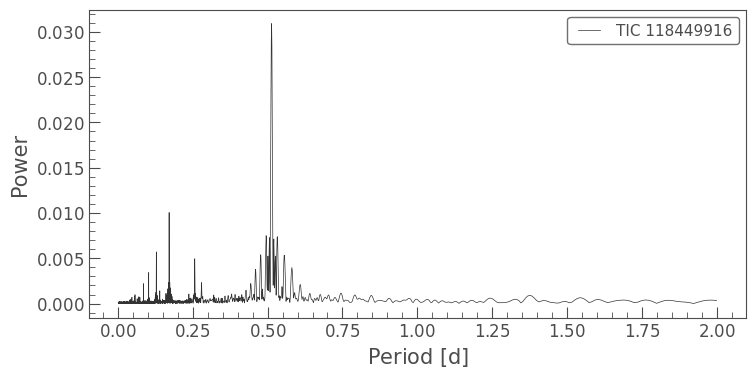

In [10]:
periodo.plot()
plt.scatter(x,y,marker="o", color="red") #adding marks to peaks and harmonics
plt.axvline(period.value, color="#FF0000", alpha = .2, linewidth = 10) #adding highlight to peak
for i in range(2,7):
  plt.axvline(period.value/i, color = "green", alpha = .4, linewidth = 9-(1.2*i)) #adding highlights to harmonics


In [34]:
perpow = [] #making an empty list for the highlights' x coordinates
perpowfl = []
for i in range(1,7):
  perpow.append((period.value/i)*100)
perpowfl.append(np.floor(perpow))
perpowfl

[array([51., 25., 17., 12., 10.,  8.])]

In [31]:
periods = []
periodsfl = []
periods.append(periodo.period[peaks]*100)
periodsfl.append(np.floor(periods))
periodsfl

[array([[51., 25., 17., 12., 10.,  8.]])]

In [36]:
a.all(periodsfl) == a.all(perpowfl)

NameError: name 'a' is not defined

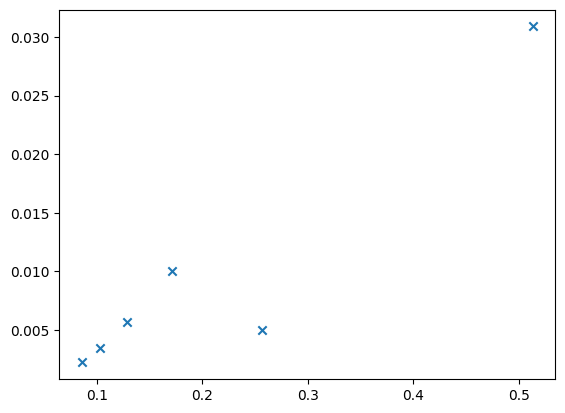

In [12]:
y = periodo.power[peaks] #defines y-values as the powers corresponding to the indexes in peaks
x = periodo.period[peaks] #defines x-values as the periods corresponding to the indexes in peaks
plt.scatter(x,y,marker="x")

In [11]:
peaks, _ = find_peaks(periodo.power, distance = 120, height = .002) #tells us the number in the index of the array where the peak is
peaks

array([ 364,  854, 1344, 1834, 2323, 2813])

In [ ]:
star1 = 'TIC 300651846'

In [ ]:
searchresult1 = lk.search_lightcurve(star1,cadence=120,author="SPOC")
searchresult1

In [ ]:
lc1_cycle1 = searchresult1[0:2].download_all()

In [ ]:
stitched11 = lc1_cycle1.stitch()

In [ ]:
pg = stitched11.to_periodogram()
pg.plot(view="period")
plt.xlim(0,1)

In [ ]:
plt.xlim(0,1)
peaks, _ = find_peaks(pg.power, height=0)

plt.plot(pg.period, pg.power)
plt.plot(peaks, pg.period[np.argmax(pg.power)], "x")
plt.plot(np.zeros_like(peaks), "--", color="gray")
plt.show()
